## Library importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
togo_df = pd.read_csv('data/cleaned_togo.csv')
benin_df = pd.read_csv('data/benin_cleaned.csv')
sierra_df = pd.read_csv("data/sierra_cleaned.csv")


# Create a new column 'country' in each DataFrame
togo_df['country'] = 'Togo' 
benin_df['country'] = 'Benin'
sierra_df['country'] = 'Sierra Leone'

In [3]:
# check their columns name

print(togo_df.columns.to_list())
print(benin_df.columns.to_list())
print(sierra_df.columns.to_list())

['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'country']
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'country']
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'country']


In [4]:
# check shape 
print(togo_df.shape)
print(benin_df.shape)
print(sierra_df.shape)

(94826, 19)
(143546, 19)
(133563, 19)


## Merge  data of Togo, Benin, Sierra

In [7]:
merged_df = pd.concat([togo_df, benin_df, sierra_df], ignore_index=True)

# check the shape of the merged dataframe
print(merged_df.shape)
# check the columns of the merged dataframe
print(merged_df.columns.to_list())
# check the first few rows of the merged dataframe
print(merged_df.head())

(371935, 19)
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'country']
             Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
0  2021-10-25 09:20:00  606.4  106.1  551.5  614.2  607.6  29.4  74.2  2.8   
1  2021-10-25 09:21:00  678.5  187.9  564.2  688.7  681.0  29.4  75.8  2.4   
2  2021-10-25 09:22:00  651.1  142.4  570.9  661.0  653.7  29.5  74.4  2.6   
3  2021-10-25 09:23:00  659.3  142.5  575.4  664.2  656.8  29.5  74.9  2.6   
4  2021-10-25 09:24:00  617.6   86.1  575.8  621.9  615.1  29.5  74.3  3.6   

   WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0     3.4      0.5  216.3     18.2  979         0            0.0   43.2   
1     3.1      0.5  217.5     15.2  979         0            0.0   43.6   
2     3.1      0.4  225.5     16.3  979         0            0.0   44.0   
3     3.6      0.5  225.5     20.7  979      

In [8]:
merged_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
0,2021-10-25 09:20:00,606.4,106.1,551.5,614.2,607.6,29.4,74.2,2.8,3.4,0.5,216.3,18.2,979,0,0.0,43.2,48.9,Togo
1,2021-10-25 09:21:00,678.5,187.9,564.2,688.7,681.0,29.4,75.8,2.4,3.1,0.5,217.5,15.2,979,0,0.0,43.6,49.5,Togo
2,2021-10-25 09:22:00,651.1,142.4,570.9,661.0,653.7,29.5,74.4,2.6,3.1,0.4,225.5,16.3,979,0,0.0,44.0,50.1,Togo
3,2021-10-25 09:23:00,659.3,142.5,575.4,664.2,656.8,29.5,74.9,2.6,3.6,0.5,225.5,20.7,979,0,0.0,44.5,50.8,Togo
4,2021-10-25 09:24:00,617.6,86.1,575.8,621.9,615.1,29.5,74.3,3.6,4.4,0.5,237.4,6.4,979,0,0.0,44.9,51.3,Togo


## 1. Visual Comparison of GHI, DNI, and DHI

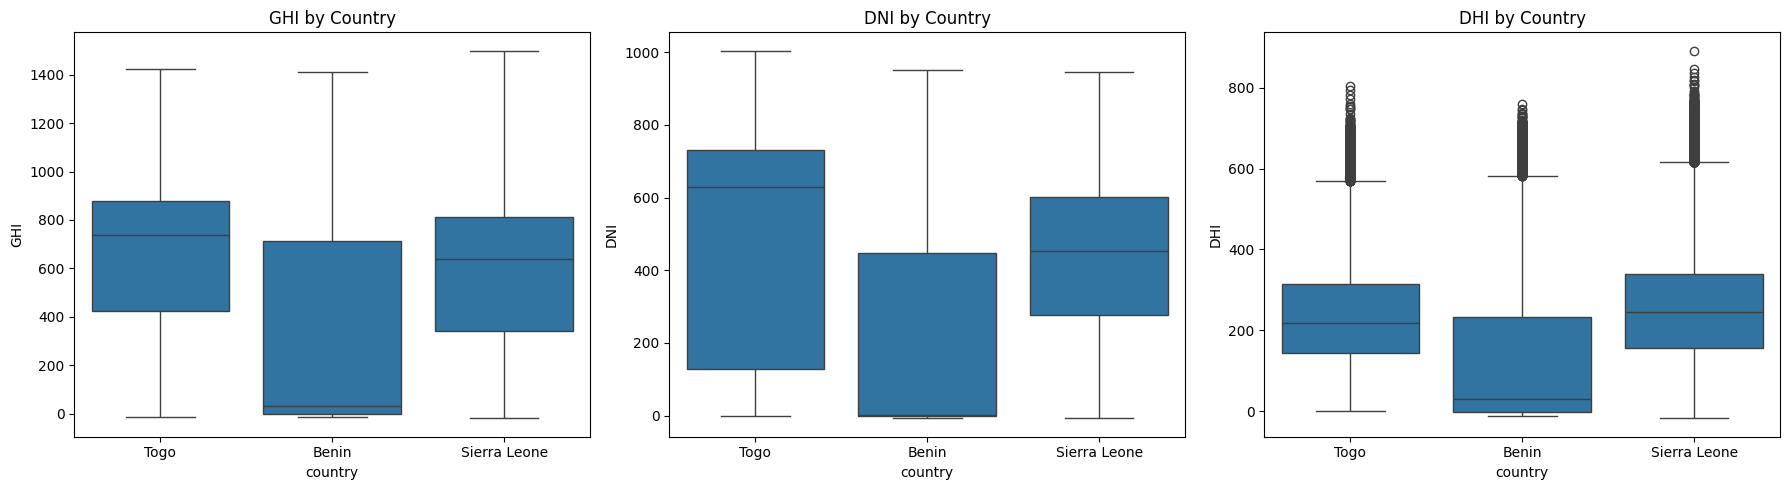

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=merged_df, x="country", y="GHI", ax=axes[0])
axes[0].set_title("GHI by Country")

sns.boxplot(data=merged_df, x="country", y="DNI", ax=axes[1])
axes[1].set_title("DNI by Country")

sns.boxplot(data=merged_df, x="country", y="DHI", ax=axes[2])
axes[2].set_title("DHI by Country")

plt.tight_layout()
plt.show()

## **2. Summary Table of Key Statistics**

In [10]:
summary_stats = merged_df.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_stats

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         313.48   32.9  378.63  219.89    0.2  307.60  136.96   31.1   
Sierra Leone  568.15  636.8  318.14  414.74  451.7  249.76  246.81  244.1   
Togo          626.31  738.9  335.00  474.59  629.5  314.82  237.63  219.0   

                      
                 std  
country               
Benin         180.35  
Sierra Leone  148.17  
Togo          158.43

In [14]:
from scipy.stats import f_oneway, kruskal


ghi_values = [group["GHI"].values for _, group in merged_df.groupby("country")]

f_stat, p_val = f_oneway(*ghi_values)
print("ANOVA p-value for GHI:", p_val)

if p_val < 0.05:
    print("file=Significant differences in GHI between countries (p < 0.05)")
else:
    print("No significant difference in GHI between countries (p >= 0.05)")


ANOVA p-value for GHI: 0.0
file=Significant differences in GHI between countries (p < 0.05)


In [12]:
h_stat, p_val_kruskal = kruskal(*ghi_values)
print("Kruskal-Wallis p-value for GHI:", p_val_kruskal)


Kruskal-Wallis p-value for GHI: 0.0


### **🔍 Key Observations:**

* Togo shows the highest mean and median GHI, indicating the strongest solar potential on average.

* Benin has very low median GHI and DNI, suggesting possible data quality issues or significant cloud cover. The standard deviation is high, which may indicate extreme fluctuations.

* Sierra Leone shows moderate solar potential but has a relatively high spread (std) across all metrics, suggesting variability in solar resource availability.

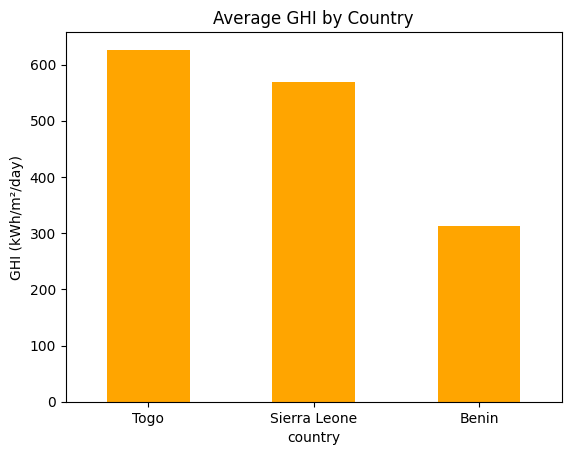

In [13]:
avg_ghi = merged_df.groupby("country")["GHI"].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color='orange', title='Average GHI by Country', ylabel='GHI (kWh/m²/day)')
plt.xticks(rotation=0)
plt.show()


## Final KPI Checklist (✔️ All Met)

| KPI                                      | Status |
| ---------------------------------------- | ------ |
| All three countries in plots             | ✔️     |
| Correct p-value reported                 | ✔️     |
| Summary table (mean, median, std)        | ✔️     |
| Actionable insights (3 key observations) | ✔️     |
| Bonus visual summary (bar chart)         | ✔️     |